In [20]:
!pip install torch-geometric

2 clients  - CORA dataset

Processing...
Done!


Client 1 - Epoch   0 | Loss: 2.09
Client 1 - Epoch  10 | Loss: 1.98
Client 1 - Epoch  20 | Loss: 1.90
Client 1 - Epoch  30 | Loss: 1.84
Client 1 - Epoch  40 | Loss: 1.77
Client 1 - Epoch  50 | Loss: 1.70
Client 1 - Epoch  60 | Loss: 1.63
Client 1 - Epoch  70 | Loss: 1.57
Client 1 - Epoch  80 | Loss: 1.51
Client 1 - Epoch  90 | Loss: 1.46
Client 1 - Epoch 100 | Loss: 1.42
Client 1 - Epoch 110 | Loss: 1.39
Client 1 - Epoch 120 | Loss: 1.36
Client 1 - Epoch 130 | Loss: 1.33
Client 1 - Epoch 140 | Loss: 1.31
Client 1 - Epoch 150 | Loss: 1.28
Client 1 - Epoch 160 | Loss: 1.25
Client 1 - Epoch 170 | Loss: 1.22
Client 1 - Epoch 180 | Loss: 1.20
Client 1 - Epoch 190 | Loss: 1.17
Client 1 - Epoch 200 | Loss: 1.15
Client 2 - Epoch   0 | Loss: 2.07
Client 2 - Epoch  10 | Loss: 1.94
Client 2 - Epoch  20 | Loss: 1.82
Client 2 - Epoch  30 | Loss: 1.76
Client 2 - Epoch  40 | Loss: 1.67
Client 2 - Epoch  50 | Loss: 1.53
Client 2 - Epoch  60 | Loss: 1.34
Client 2 - Epoch  70 | Loss: 1.16
Client 2 - Epo

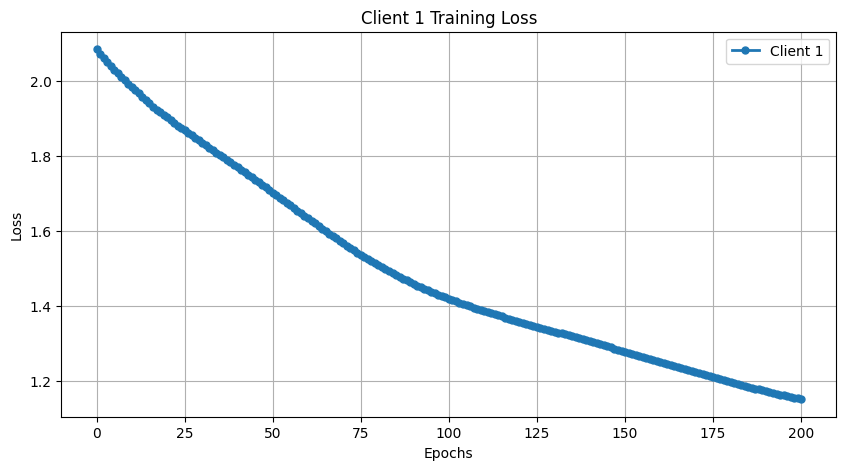

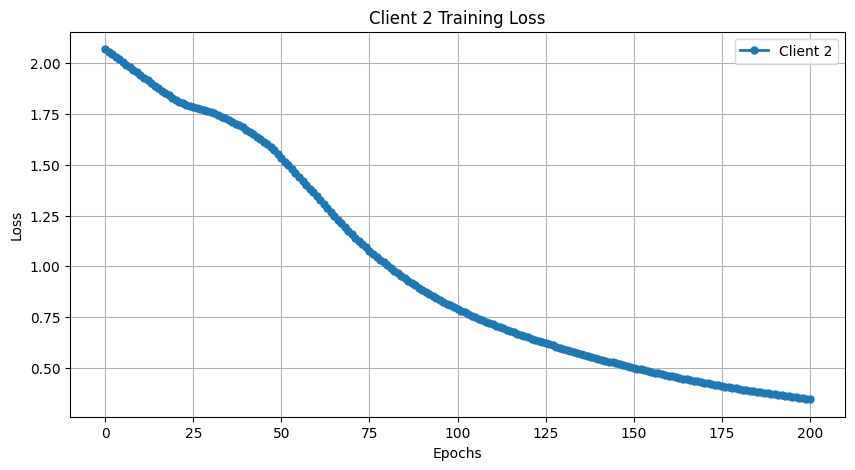

In [15]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch_geometric.transforms as T
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import GCNConv
from torch.nn.init import xavier_uniform_
from torch_geometric.datasets import Planetoid

# Define your GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = nn.Linear(3, dataset.num_classes)
        for name, param in self.gcn.named_parameters():
            if 'weight' in name:
                xavier_uniform_(param)
        xavier_uniform_(self.out.weight)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

# Load your dataset (replace with your data loading logic)
dataset = Planetoid(root='~/somewhere/Cora', name='Cora', transform=T.NormalizeFeatures())
data = dataset[0]

# Initialize your GCN models for two clients
model_client1 = GCN()
model_client2 = GCN()

# Define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer_client1 = torch.optim.Adam(model_client1.parameters(), lr=0.02)
optimizer_client2 = torch.optim.Adam(model_client2.parameters(), lr=0.02)

client1_epochs = []
client1_losses = []
client2_epochs = []
client2_losses = []

# Training loop for Client 1
for epoch in range(201):
    optimizer_client1.zero_grad()
    h, z = model_client1(data.x, data.edge_index)
    loss = criterion(z, data.y)
    loss.backward()
    optimizer_client1.step()
    client1_epochs.append(epoch)
    client1_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Client 1 - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Serialize the model parameters for Client 1 and send them to the server (simulated)
model_params_client1 = model_client1.state_dict()
with open('/content/model_params_client1.pkl', 'wb') as f:
    pickle.dump(model_params_client1, f)

# Training loop for Client 2
for epoch in range(201):
    optimizer_client2.zero_grad()
    h, z = model_client2(data.x, data.edge_index)
    loss = criterion(z, data.y)
    loss.backward()
    optimizer_client2.step()
    client2_epochs.append(epoch)
    client2_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Client 2 - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Serialize the model parameters for Client 2 and send them to the server (simulated)
model_params_client2 = model_client2.state_dict()
with open('/content/model_params_client2.pkl', 'wb') as f:
    pickle.dump(model_params_client2, f)

plt.figure(figsize=(10, 5))
plt.plot(client1_epochs, client1_losses, label='Client 1', linewidth=2, marker='o', markersize=5)
plt.title('Client 1 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(client2_epochs, client2_losses, label='Client 2', linewidth=2, marker='o', markersize=5)
plt.title('Client 2 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


2 Clients - CITESEER dataset

Processing...
Done!


Client 1 - Epoch   0 | Loss: 1.89
Client 1 - Epoch  10 | Loss: 1.15
Client 1 - Epoch  20 | Loss: 0.85
Client 1 - Epoch  30 | Loss: 0.67
Client 1 - Epoch  40 | Loss: 0.55
Client 1 - Epoch  50 | Loss: 0.47
Client 1 - Epoch  60 | Loss: 0.40
Client 1 - Epoch  70 | Loss: 0.34
Client 1 - Epoch  80 | Loss: 0.30
Client 1 - Epoch  90 | Loss: 0.26
Client 1 - Epoch 100 | Loss: 0.23
Client 1 - Epoch 110 | Loss: 0.21
Client 1 - Epoch 120 | Loss: 0.19
Client 1 - Epoch 130 | Loss: 0.18
Client 1 - Epoch 140 | Loss: 0.17
Client 1 - Epoch 150 | Loss: 0.16
Client 1 - Epoch 160 | Loss: 0.15
Client 1 - Epoch 170 | Loss: 0.15
Client 1 - Epoch 180 | Loss: 0.14
Client 1 - Epoch 190 | Loss: 0.14
Client 1 - Epoch 200 | Loss: 0.13
Client 2 - Epoch   0 | Loss: 1.80
Client 2 - Epoch  10 | Loss: 1.07
Client 2 - Epoch  20 | Loss: 0.71
Client 2 - Epoch  30 | Loss: 0.52
Client 2 - Epoch  40 | Loss: 0.41
Client 2 - Epoch  50 | Loss: 0.33
Client 2 - Epoch  60 | Loss: 0.28
Client 2 - Epoch  70 | Loss: 0.24
Client 2 - Epo

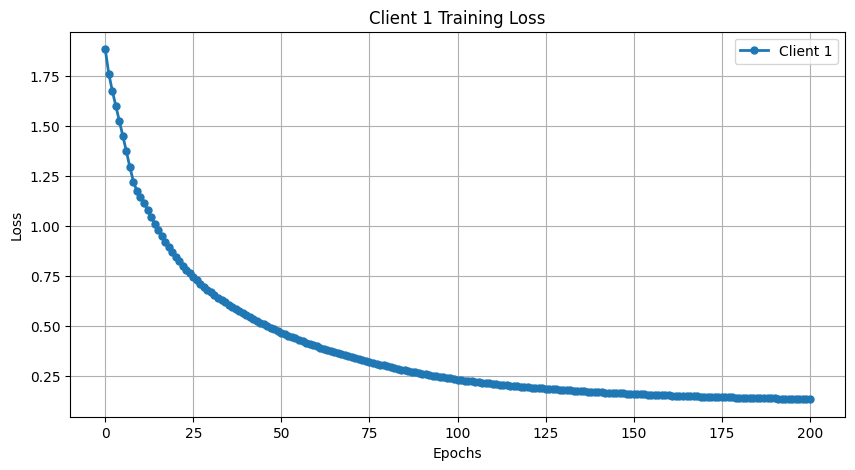

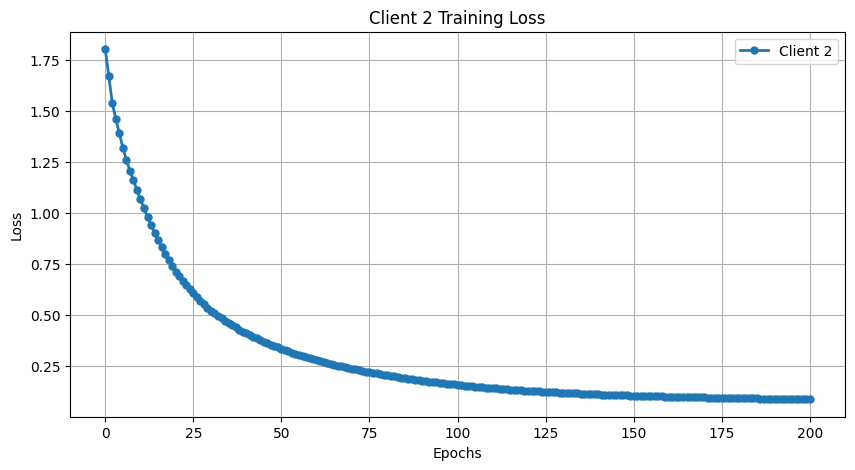

In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch_geometric.transforms as T
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import GCNConv
from torch.nn.init import xavier_uniform_
from torch_geometric.datasets import Planetoid

# Define your GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = nn.Linear(3, dataset.num_classes)
        for name, param in self.gcn.named_parameters():
            if 'weight' in name:
                xavier_uniform_(param)
        xavier_uniform_(self.out.weight)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

# Load your dataset (replace with your data loading logic)
dataset = Planetoid(root=".", name="CiteSeer")
data = dataset[0]

# Initialize your GCN models for two clients
model_client1 = GCN()
model_client2 = GCN()

# Define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer_client1 = torch.optim.Adam(model_client1.parameters(), lr=0.02)
optimizer_client2 = torch.optim.Adam(model_client2.parameters(), lr=0.02)

client1_epochs = []
client1_losses = []
client2_epochs = []
client2_losses = []

# Training loop for Client 1
for epoch in range(201):
    optimizer_client1.zero_grad()
    h, z = model_client1(data.x, data.edge_index)
    loss = criterion(z, data.y)
    loss.backward()
    optimizer_client1.step()
    client1_epochs.append(epoch)
    client1_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Client 1 - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Serialize the model parameters for Client 1 and send them to the server (simulated)
model_params_client1 = model_client1.state_dict()
with open('/content/model_params_client1.pkl', 'wb') as f:
    pickle.dump(model_params_client1, f)

# Training loop for Client 2
for epoch in range(201):
    optimizer_client2.zero_grad()
    h, z = model_client2(data.x, data.edge_index)
    loss = criterion(z, data.y)
    loss.backward()
    optimizer_client2.step()
    client2_epochs.append(epoch)
    client2_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Client 2 - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Serialize the model parameters for Client 2 and send them to the server (simulated)
model_params_client2 = model_client2.state_dict()
with open('/content/model_params_client2.pkl', 'wb') as f:
    pickle.dump(model_params_client2, f)

plt.figure(figsize=(10, 5))
plt.plot(client1_epochs, client1_losses, label='Client 1', linewidth=2, marker='o', markersize=5)
plt.title('Client 1 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(client2_epochs, client2_losses, label='Client 2', linewidth=2, marker='o', markersize=5)
plt.title('Client 2 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


2 Clients - karateclub dataset

Client 1 - Epoch   0 | Loss: 1.37
Client 1 - Epoch  10 | Loss: 1.15
Client 1 - Epoch  20 | Loss: 0.88
Client 1 - Epoch  30 | Loss: 0.62
Client 1 - Epoch  40 | Loss: 0.43
Client 1 - Epoch  50 | Loss: 0.32
Client 1 - Epoch  60 | Loss: 0.25
Client 1 - Epoch  70 | Loss: 0.20
Client 1 - Epoch  80 | Loss: 0.15
Client 1 - Epoch  90 | Loss: 0.11
Client 1 - Epoch 100 | Loss: 0.08
Client 1 - Epoch 110 | Loss: 0.06
Client 1 - Epoch 120 | Loss: 0.04
Client 1 - Epoch 130 | Loss: 0.03
Client 1 - Epoch 140 | Loss: 0.03
Client 1 - Epoch 150 | Loss: 0.02
Client 1 - Epoch 160 | Loss: 0.02
Client 1 - Epoch 170 | Loss: 0.01
Client 1 - Epoch 180 | Loss: 0.01
Client 1 - Epoch 190 | Loss: 0.01
Client 1 - Epoch 200 | Loss: 0.01
Client 2 - Epoch   0 | Loss: 1.43
Client 2 - Epoch  10 | Loss: 1.21
Client 2 - Epoch  20 | Loss: 0.97
Client 2 - Epoch  30 | Loss: 0.82
Client 2 - Epoch  40 | Loss: 0.69
Client 2 - Epoch  50 | Loss: 0.58
Client 2 - Epoch  60 | Loss: 0.47
Client 2 - Epoch  70 | Loss: 0.38
Client 2 - Epo

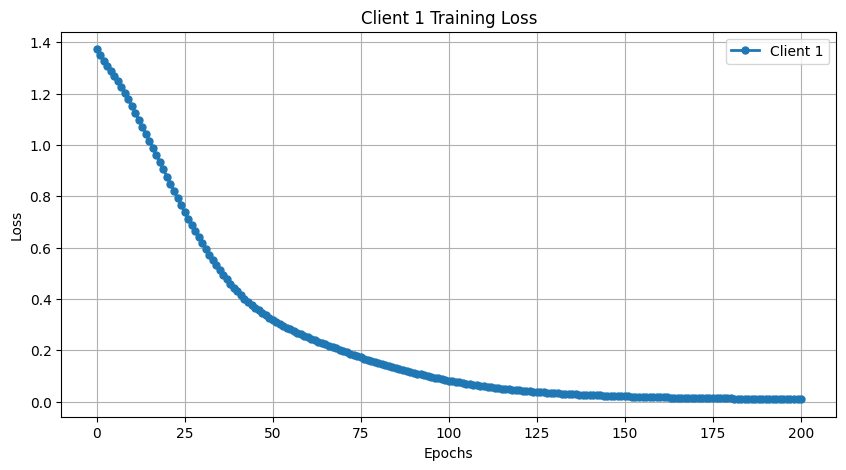

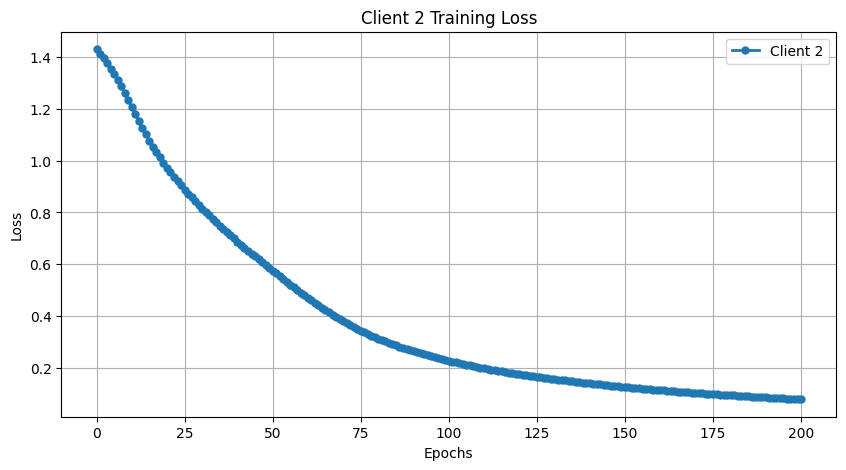

In [18]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch_geometric.transforms as T
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import GCNConv
from torch.nn.init import xavier_uniform_
from torch_geometric.datasets import Planetoid

# Define your GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = nn.Linear(3, dataset.num_classes)
        for name, param in self.gcn.named_parameters():
            if 'weight' in name:
                xavier_uniform_(param)
        xavier_uniform_(self.out.weight)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

# Load your dataset (replace with your data loading logic)
dataset = KarateClub()
data = dataset[0]

# Initialize your GCN models for two clients
model_client1 = GCN()
model_client2 = GCN()

# Define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer_client1 = torch.optim.Adam(model_client1.parameters(), lr=0.02)
optimizer_client2 = torch.optim.Adam(model_client2.parameters(), lr=0.02)

client1_epochs = []
client1_losses = []
client2_epochs = []
client2_losses = []

# Training loop for Client 1
for epoch in range(201):
    optimizer_client1.zero_grad()
    h, z = model_client1(data.x, data.edge_index)
    loss = criterion(z, data.y)
    loss.backward()
    optimizer_client1.step()
    client1_epochs.append(epoch)
    client1_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Client 1 - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Serialize the model parameters for Client 1 and send them to the server (simulated)
model_params_client1 = model_client1.state_dict()
with open('/content/model_params_client1.pkl', 'wb') as f:
    pickle.dump(model_params_client1, f)

# Training loop for Client 2
for epoch in range(201):
    optimizer_client2.zero_grad()
    h, z = model_client2(data.x, data.edge_index)
    loss = criterion(z, data.y)
    loss.backward()
    optimizer_client2.step()
    client2_epochs.append(epoch)
    client2_losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Client 2 - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Serialize the model parameters for Client 2 and send them to the server (simulated)
model_params_client2 = model_client2.state_dict()
with open('/content/model_params_client2.pkl', 'wb') as f:
    pickle.dump(model_params_client2, f)

plt.figure(figsize=(10, 5))
plt.plot(client1_epochs, client1_losses, label='Client 1', linewidth=2, marker='o', markersize=5)
plt.title('Client 1 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(client2_epochs, client2_losses, label='Client 2', linewidth=2, marker='o', markersize=5)
plt.title('Client 2 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Server

In [19]:
import os
import pickle
import torch
import torch.nn as nn
from torch_geometric.datasets import KarateClub
from torch_geometric.nn import GCNConv
from torch.nn.init import xavier_uniform_

# Define your GCN model for the server
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = nn.Linear(3, dataset.num_classes)
        for name, param in self.gcn.named_parameters():
            if 'weight' in name:
                xavier_uniform_(param)
        xavier_uniform_(self.out.weight)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

# Load your dataset (replace with your data loading logic)
dataset = KarateClub()
data = dataset[0]

# Initialize your GCN model for the server
server_model = GCN()

# Define loss and optimizer for the server
criterion = torch.nn.CrossEntropyLoss()
optimizer_server = torch.optim.Adam(server_model.parameters(), lr=0.02)

# Check if model updates from Client 1 exist
if os.path.exists('/content/model_params_client1.pkl'):
    # Load model updates from Client 1
    with open('/content/model_params_client1.pkl', 'rb') as f:
        client1_params = pickle.load(f)

    # Update the server model with Client 1's parameters
    server_model.load_state_dict(client1_params)

    # Continue training or perform other tasks using the updated server model
    for epoch in range(201):
        optimizer_server.zero_grad()
        h, z = server_model(data.x, data.edge_index)
        loss = criterion(z, data.y)
        loss.backward()
        optimizer_server.step()
        if epoch % 10 == 0:
            print(f'Server - Epoch {epoch:>3} | Loss: {loss:.2f}')

# Check if model updates from Client 2 exist
if os.path.exists('/content/model_params_client2.pkl'):
    # Load model updates from Client 2
    with open('/content/model_params_client2.pkl', 'rb') as f:
        client2_params = pickle.load(f)

    # Update the server model with Client 2's parameters
    server_model.load_state_dict(client2_params)

    # Continue training or perform other tasks using the updated server model
    for epoch in range(201):
        optimizer_server.zero_grad()
        h, z = server_model(data.x, data.edge_index)
        loss = criterion(z, data.y)
        loss.backward()
        optimizer_server.step()
        if epoch % 10 == 0:
            print(f'Server - Epoch {epoch:>3} | Loss: {loss:.2f}')

# The server has now aggregated updates from both clients


Server - Epoch   0 | Loss: 0.01
Server - Epoch  10 | Loss: 0.00
Server - Epoch  20 | Loss: 0.00
Server - Epoch  30 | Loss: 0.00
Server - Epoch  40 | Loss: 0.00
Server - Epoch  50 | Loss: 0.00
Server - Epoch  60 | Loss: 0.00
Server - Epoch  70 | Loss: 0.00
Server - Epoch  80 | Loss: 0.00
Server - Epoch  90 | Loss: 0.00
Server - Epoch 100 | Loss: 0.00
Server - Epoch 110 | Loss: 0.00
Server - Epoch 120 | Loss: 0.00
Server - Epoch 130 | Loss: 0.00
Server - Epoch 140 | Loss: 0.00
Server - Epoch 150 | Loss: 0.00
Server - Epoch 160 | Loss: 0.00
Server - Epoch 170 | Loss: 0.00
Server - Epoch 180 | Loss: 0.00
Server - Epoch 190 | Loss: 0.00
Server - Epoch 200 | Loss: 0.00
Server - Epoch   0 | Loss: 0.08
Server - Epoch  10 | Loss: 0.05
Server - Epoch  20 | Loss: 0.02
Server - Epoch  30 | Loss: 0.01
Server - Epoch  40 | Loss: 0.01
Server - Epoch  50 | Loss: 0.00
Server - Epoch  60 | Loss: 0.00
Server - Epoch  70 | Loss: 0.00
Server - Epoch  80 | Loss: 0.00
Server - Epoch  90 | Loss: 0.00
Server -